# KNN Exercise

![iris](images/iris.jpg)

We are going to use the famous **iris data set** again. 

The dataset consists of four attributes, which can be used to distinguish different iris species: 
* sepal-width
* sepal-length
* petal-width 
* petal-length. 


The task is to predict the class to which these plants belong. There are three classes in the dataset: **Iris-setosa, Iris-versicolor and Iris-virginica.** 

Further details of the dataset are available here.
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

## Task

1. Please import and pre-process the data (as far as it's necessary). Afterwards split it in a train and test set, fit a KNN model and make predictions on the test set. The last step is to evaluate your model. Try to also scale your data and fit the model to the unscaled and scaled data. Can you see a difference in performance? 
If you can't it's because the original features are all on a very similar scale. Try multiplying one of the features by a factor of 10 and fitting the model to unscaled and scaled data. The difference should now be obvious 

In [38]:
import pandas as pd

df = pd.read_csv("data/iris.csv")
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
# Relabel column "species"
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["species_encoded"] = le.fit_transform(df["species"])

In [26]:
# Define Features and target

X = df.drop(columns=["species", "species_encoded"])
y = df["species_encoded"]


In [27]:
# Test-Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
#stratify=y erhält Klassenverteilung

Accuracy: 0.98
Recall (macro): 0.98
Recall (weighted): 0.98
--------------------------------------------------


<Axes: >

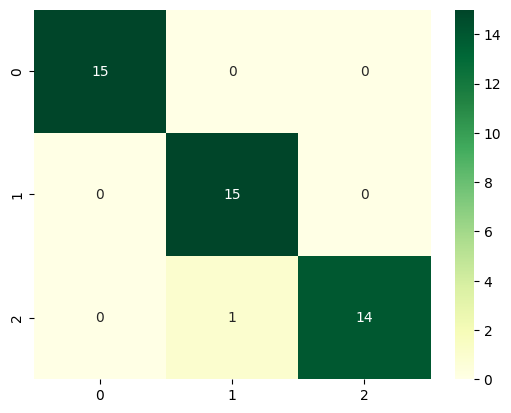

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
import seaborn as sns

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred).round(2))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro").round(2))
print("Recall (weighted):", recall_score(y_test, y_pred, average="weighted").round(2))
print("-----"*10)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGn")


In [29]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [30]:
y_pred = knn.predict(X_test)

print("Accuracy (unscaled):", accuracy_score(y_test, y_pred))

Accuracy (unscaled): 0.9777777777777777


Accuracy (scaled): 0.9111111111111111
Recall (macro): 0.98
Recall (weighted): 0.98
--------------------------------------------------


<Axes: >

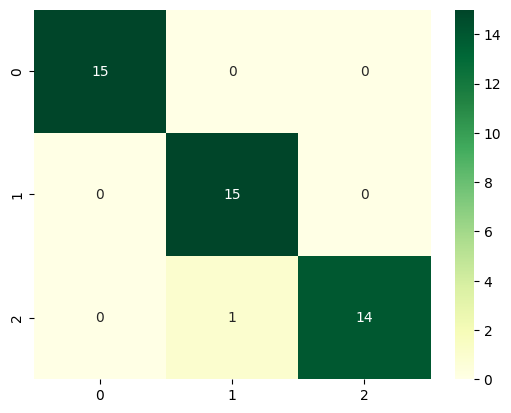

In [31]:
# KNN mit Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)

print("Accuracy (scaled):", accuracy_score(y_test, y_pred_scaled))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro").round(2))
print("Recall (weighted):", recall_score(y_test, y_pred, average="weighted").round(2))
print("-----"*10)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGn")


In [44]:
# Feature verzerren

X_distorted = X.copy()
X_distorted["sepal_width"] *= 100


In [45]:
X_distorted.head(15)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,350.0,1.4,0.2
1,4.9,300.0,1.4,0.2
2,4.7,320.0,1.3,0.2
3,4.6,310.0,1.5,0.2
4,5.0,360.0,1.4,0.2
5,5.4,390.0,1.7,0.4
6,4.6,340.0,1.4,0.3
7,5.0,340.0,1.5,0.2
8,4.4,290.0,1.4,0.2
9,4.9,310.0,1.5,0.1


Accuracy (distorted, unscaled): 0.6666666666666666
Recall (macro): 0.67
Recall (weighted): 0.67
--------------------------------------------------


<Axes: >

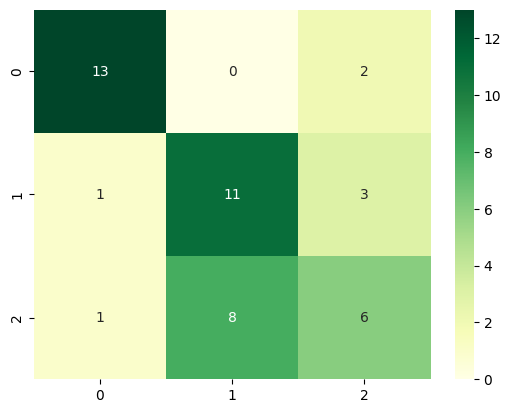

In [46]:
# KNN auf verzerrten untrainierten Daten

X_train_d, X_test_d, y_train, y_test = train_test_split(
    X_distorted, y, test_size=0.3, random_state=42, stratify=y
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_d, y_train)

y_pred = knn.predict(X_test_d)

print("Accuracy (distorted, unscaled):", accuracy_score(y_test, y_pred))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro").round(2))
print("Recall (weighted):", recall_score(y_test, y_pred, average="weighted").round(2))
print("-----"*10)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGn")



Accuracy (distorted, scaled): 0.9111111111111111
Recall (macro): 0.91
Recall (weighted): 0.91
--------------------------------------------------


<Axes: >

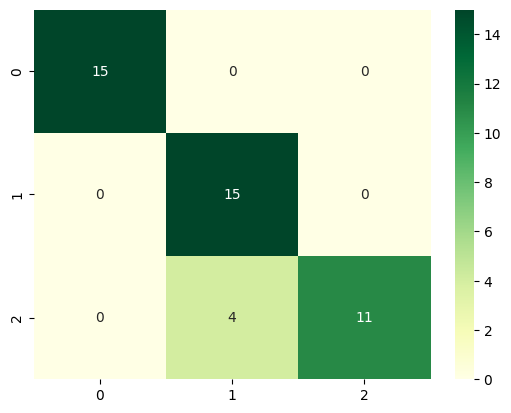

In [47]:
# KNN auf verzerrten skalierten Daten

scaler = StandardScaler()
X_train_d_scaled = scaler.fit_transform(X_train_d)
X_test_d_scaled = scaler.transform(X_test_d)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_d_scaled, y_train)

y_pred = knn.predict(X_test_d_scaled)

print("Accuracy (distorted, scaled):", accuracy_score(y_test, y_pred))
print("Recall (macro):", recall_score(y_test, y_pred, average="macro").round(2))
print("Recall (weighted):", recall_score(y_test, y_pred, average="weighted").round(2))
print("-----"*10)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGn")



2. Please also calculate the accuracy for K values of 1 to 40. In each iteration the accuracy for the predicted values of the test set is calculated and the result is appended to an error list.
The next step is to plot the accuracy values against K values.

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []

k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    accuracy_scores.append(acc)


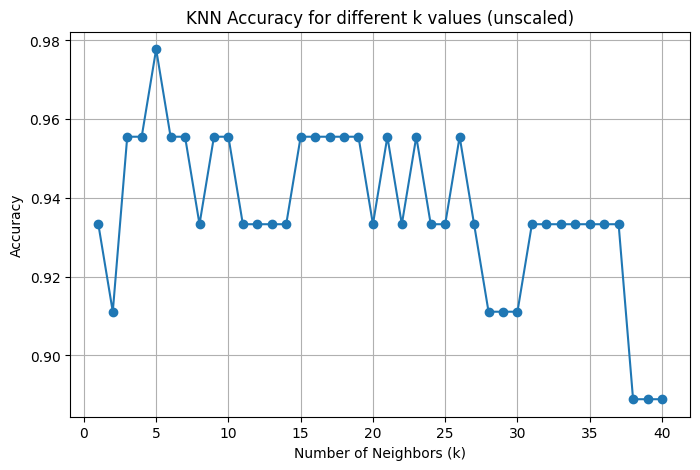

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for different k values (unscaled)")
plt.grid(True)
plt.show()
